In [1]:
import pandas as pd

In [2]:
url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
data = pd.read_csv(url)

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)

In [4]:
#천단위가 붙지않은 Year데이터 전처리
def change_year(x):
  if ((x>=0) and (x<=21)):
    x+=2000
  if ((x>21) and (x<100)):
    x+=1900 
  return x

In [5]:
data['Year'] = data['Year'].apply(change_year)

In [6]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
#float화 및 M,K 데이터 전처리
columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for element in columns: 
  column = list(data[element])
  for i in range(len(column)):
    try :
      column[i]= float(column[i])
    except :
      if 'K' in (column[i]):
        print('------------------------------------------------------------------------')
        print("before : ",column[i])
        num = column[i].replace('K','')
        column[i]=float(num)*1000
        print('after : ',column[i])
        print('------------------------------------------------------------------------') 
      elif 'M' in (column[i]):
        print('------------------------------------------------------------------------')
        print("before : ",column[i])
        num = column[i].replace('M','')
        column[i]= float(num)*1000000
        print('after : ',column[i])
        print('------------------------------------------------------------------------') 
  data[element] = column

------------------------------------------------------------------------
before :  480K
after :  480000.0
------------------------------------------------------------------------
------------------------------------------------------------------------
before :  60K
after :  60000.0
------------------------------------------------------------------------
------------------------------------------------------------------------
before :  0K
after :  0.0
------------------------------------------------------------------------
------------------------------------------------------------------------
before :  0.58M
after :  580000.0
------------------------------------------------------------------------
------------------------------------------------------------------------
before :  0.25M
after :  250000.0
------------------------------------------------------------------------
------------------------------------------------------------------------
before :  5.55M
after :  5550000.0
----

In [8]:
data['Total_Sales']=data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)#특정열별로 합계 구하기

In [9]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


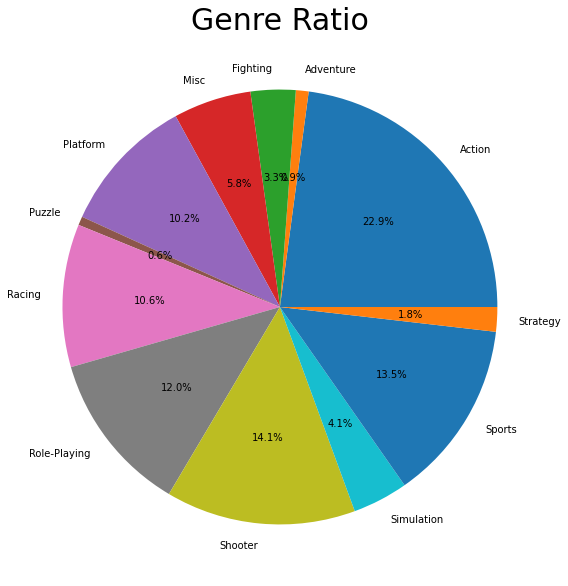

In [10]:
import matplotlib.pyplot as plt

data_Genre=data.groupby(by=['Genre'], as_index=False).sum()
data_Genre=data_Genre.drop(['Year'],axis=1)
labels=list(data_Genre.Genre)
ratio = list(data_Genre.Total_Sales)
plt.rcParams['figure.figsize'] = [20, 10]#size지정
plt.title('Genre Ratio',fontsize=30)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

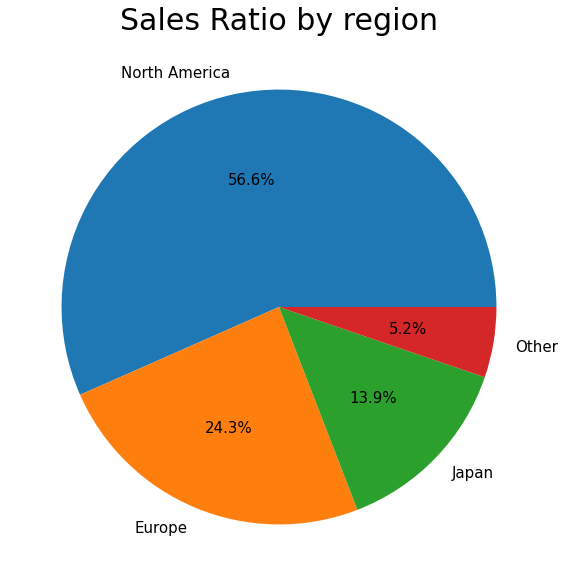

In [11]:
labels=['North America','Europe','Japan','Other']
ratio=list(data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum())
plt.rcParams['figure.figsize'] = [20, 10]#size지정
plt.title('Sales Ratio by region',fontsize=30)
plt.pie(ratio, labels=labels, autopct='%.1f%%',textprops={'fontsize': 15})
plt.show()

In [12]:
data_gr = data[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]

In [13]:
#결측치 확인
data_gr.isnull().sum()

Genre          50
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64

In [14]:
#Genre에서 결측치 확인 → 장르가 NaN이므로 지역과 장르간 데이터분석이 불가능하므로 결측치 행 삭제 
data_gr[data_gr['Genre'].isnull()]
data_gr=data_gr.dropna(axis=0)
data_gr.isnull().sum()

Genre          0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [15]:
data_gr

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,0.04,0.00,0.00,0.00,0.04
1,Action,0.17,0.00,0.00,0.01,0.18
2,Adventure,0.00,0.00,0.02,0.00,0.02
3,Misc,0.04,0.00,0.00,0.00,0.04
4,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01,0.20
16594,Action,0.01,0.00,0.00,0.00,0.01
16595,Sports,0.44,0.19,0.03,0.13,0.79
16596,Action,0.05,0.05,0.25,0.03,0.38


In [16]:
data_gr=data_gr.groupby(by=['Genre'], as_index=False).sum()
data_gr

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,21650853.16,7210514.95,1440156.46,1340185.11,31641709.68
1,Adventure,760104.90,190063.86,80051.87,280016.53,1310237.16
2,Fighting,1360221.84,1420099.80,1340086.00,500036.14,4620443.78
3,Misc,4300403.75,2820209.54,420104.85,460073.58,8000791.72
4,Platform,5220441.22,7620193.99,790129.86,520051.01,14150816.08
5,Puzzle,430122.92,410050.32,56.87,50012.47,890242.58
6,Racing,11950345.24,2040235.06,280056.12,420076.68,14690713.10
7,Role-Playing,1600317.94,1610181.97,11780333.17,1620055.34,16610888.42
8,Shooter,12490569.43,6230306.82,60038.22,740101.91,19521016.38
9,Simulation,3240179.72,1110112.24,1280062.42,70031.41,5700385.79


Text(0.5, 1.0, 'Relation between Genre and North America')

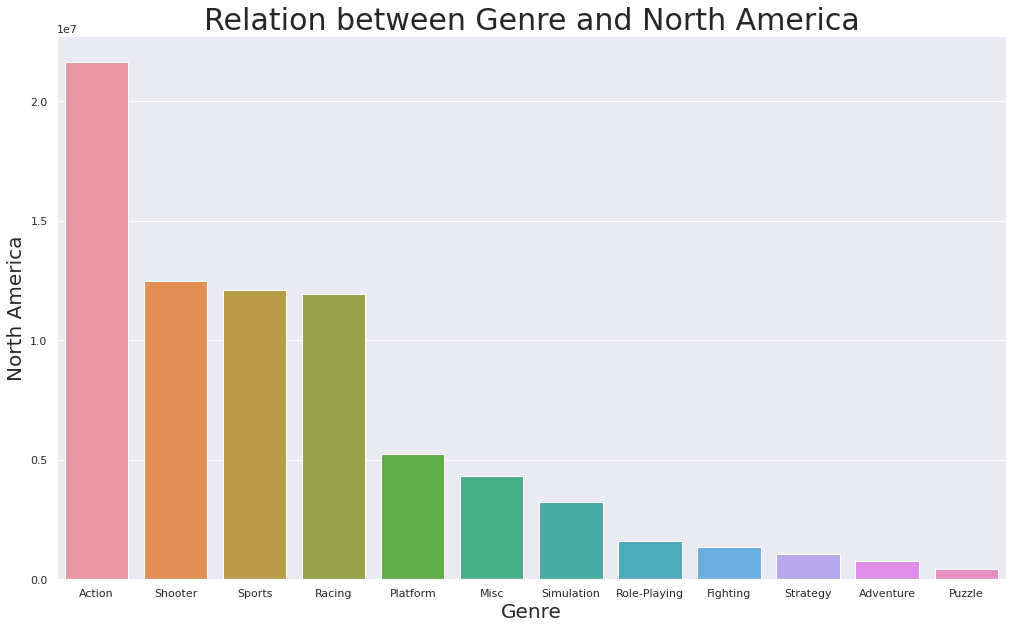

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data_gr=data_gr.sort_values(by=['NA_Sales'], axis=0, ascending=False)
# 북미지역의  게임장르별 판매량 추이
sns.set(rc={'figure.figsize':(17,10)})
sns.set(font_scale=1)
s1=sns.barplot(
    data = data_gr,
    x= "Genre",
    y= "NA_Sales",
    ci = None#error bar 제거
)
s1.set_xlabel('Genre',size=20)
s1.set_ylabel('North America',size=20)
s1.set_title("Relation between Genre and North America",size=30)

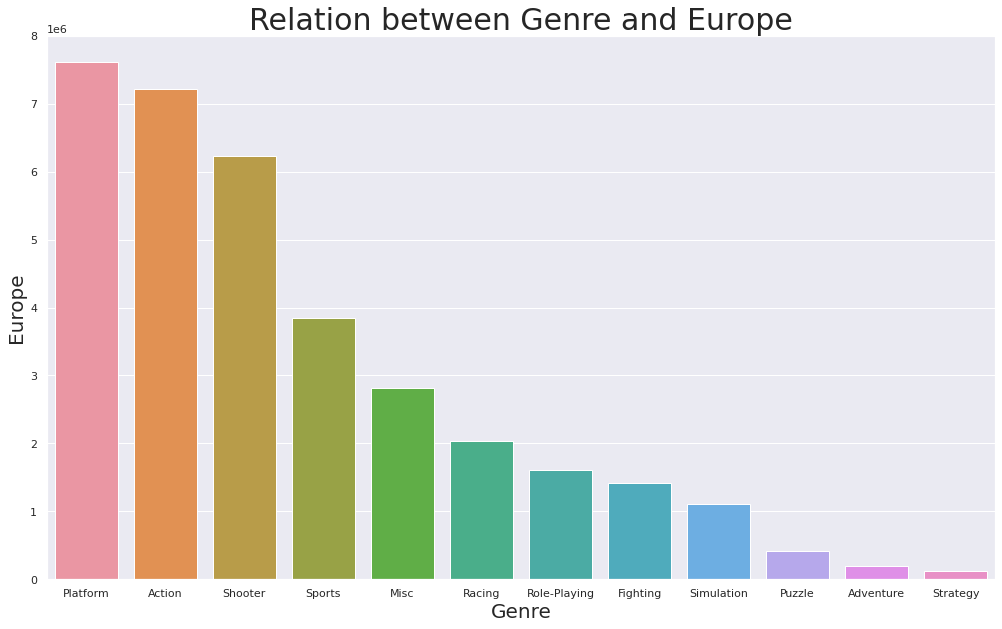

In [18]:
# 유럽지역의 게임장르별 판매량 추이
sns.set(rc={'figure.figsize':(17,10)})
sns.set(font_scale=1)
data_gr=data_gr.sort_values(by=['EU_Sales'], axis=0, ascending=False)
s2=sns.barplot(
    data = data_gr,
    x= "Genre",
    y= "EU_Sales",
    ci = None
)
s2.set_xlabel('Genre',size=20)
s2.set_ylabel('Europe',size=20)
s2.set_title("Relation between Genre and Europe",size=30)
s2

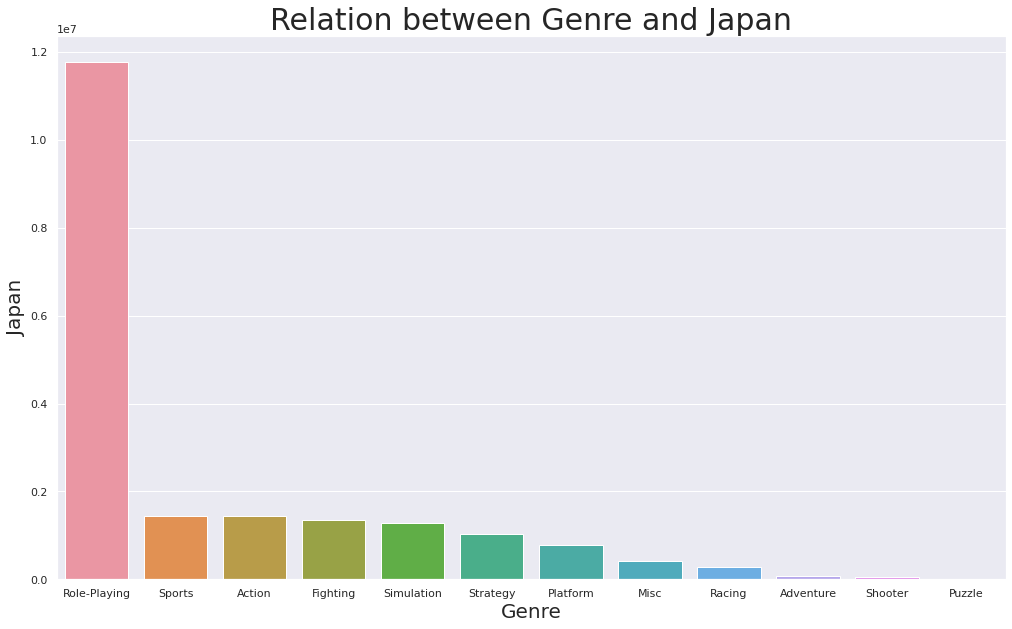

In [19]:
# 일본지역의 게임장르별 판매량 추이
sns.set(rc={'figure.figsize':(17,10)})
sns.set(font_scale=1)
data_gr=data_gr.sort_values(by=['JP_Sales'], axis=0, ascending=False)
s3=sns.barplot(
    data = data_gr,
    x= "Genre",
    y= "JP_Sales",
    ci = None
)
s3.set_xlabel('Genre',size=20)
s3.set_ylabel('Japan',size=20)
s3.set_title("Relation between Genre and Japan",size=30)
s3

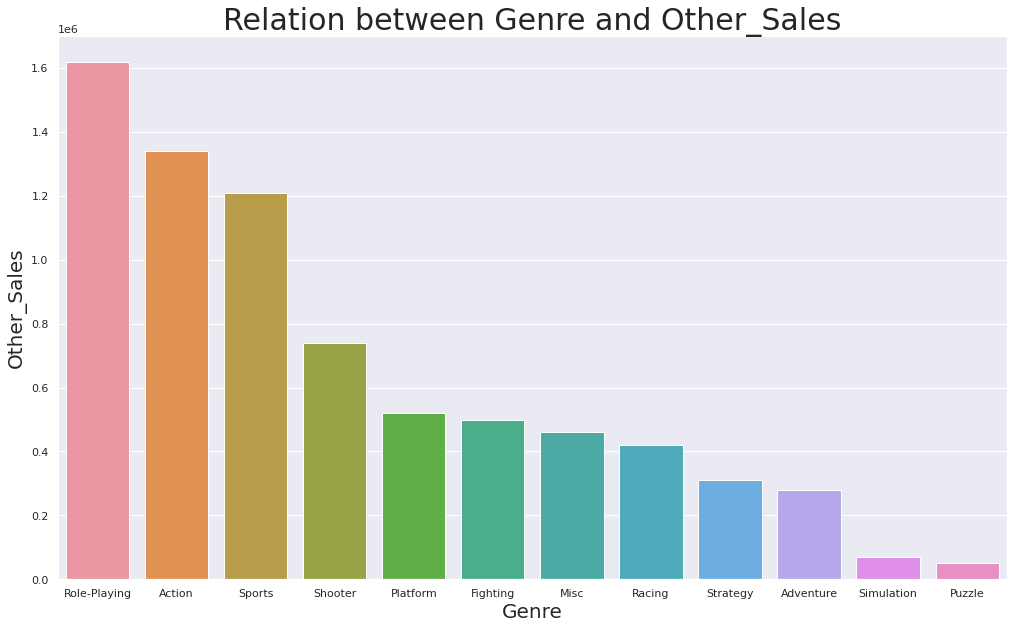

In [20]:
# 타지역의 게임장르별 판매량 추이
sns.set(rc={'figure.figsize':(17,10)})
sns.set(font_scale=1)
data_gr=data_gr.sort_values(by=['Other_Sales'], axis=0, ascending=False)
s2=sns.barplot(
    data = data_gr,
    x= "Genre",
    y= "Other_Sales",
    ci = None
)
s2.set_xlabel('Genre',size=20)
s2.set_ylabel('Other_Sales',size=20)
s2.set_title("Relation between Genre and Other_Sales",size=30)
s2

In [21]:
#연도별 게임트렌드 파악을 위한 데이터 전처리
data_y = data[['Year','Platform','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]

In [22]:
data_y.dtypes

Year           float64
Platform        object
Genre           object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total_Sales    float64
dtype: object

In [23]:
#결측치 확인
data_y.isnull().sum()

Year           271
Platform         0
Genre           50
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [24]:
 data_y=data_y.dropna(subset=['Year'])#Year의 결측치 제거
 data_y.isnull().sum()

Year            0
Platform        0
Genre          50
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64

In [25]:
#천단위가 붙지않은 Year데이터 전처리
def change_year(x):
  if ((x>=0) and (x<=21)):
    x+=2000
  if ((x>21) and (x<100)):
    x+=1900 
  return x

In [26]:
data_y = data_y.sort_values(by=['Year'],axis=0)
data_y['Year'] = data_y['Year'].apply(change_year)
data_y

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9226,1980.0,2600,Misc,0.25,0.02,0.00,0.00,0.27
5723,1980.0,2600,Shooter,4.00,0.26,0.00,0.05,4.31
14264,1980.0,2600,Fighting,0.72,0.04,0.00,0.01,0.77
12314,1980.0,2600,NaN,0.46,0.03,0.00,0.01,0.50
5938,1980.0,2600,Misc,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...
7177,2016.0,3DS,Action,0.00,0.03,0.04,0.00,0.07
15233,2017.0,PSV,Role-Playing,0.00,0.00,0.01,0.00,0.01
5310,2017.0,PSV,Action,0.00,0.00,0.01,0.00,0.01
10107,2017.0,PS4,Role-Playing,0.00,0.00,0.03,0.00,0.03


In [27]:
#연도별 게임장르 트렌드 분석을 위해 Genre항목 결측치 제거
data_yg = data_y.dropna(subset=['Genre'])
data_yg

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9226,1980.0,2600,Misc,0.25,0.02,0.00,0.00,0.27
5723,1980.0,2600,Shooter,4.00,0.26,0.00,0.05,4.31
14264,1980.0,2600,Fighting,0.72,0.04,0.00,0.01,0.77
5938,1980.0,2600,Misc,1.07,0.07,0.00,0.01,1.15
10121,1980.0,2600,Misc,0.99,0.05,0.00,0.01,1.05
...,...,...,...,...,...,...,...,...
7177,2016.0,3DS,Action,0.00,0.03,0.04,0.00,0.07
15233,2017.0,PSV,Role-Playing,0.00,0.00,0.01,0.00,0.01
5310,2017.0,PSV,Action,0.00,0.00,0.01,0.00,0.01
10107,2017.0,PS4,Role-Playing,0.00,0.00,0.03,0.00,0.03


[Text(0.5, 1.0, 'Year trend by Genre')]

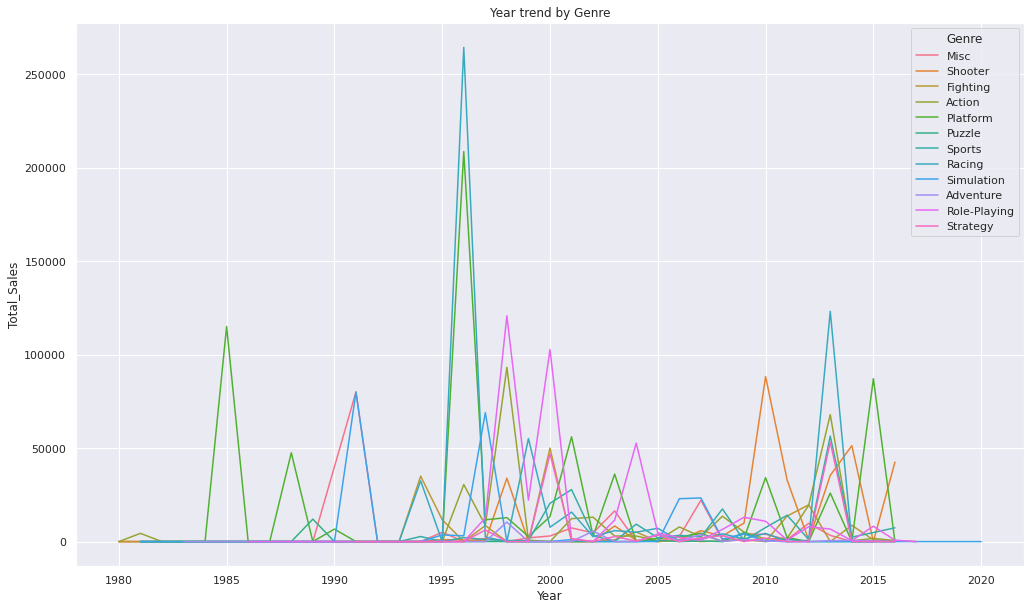

In [28]:
sns.set(rc={'figure.figsize':(17,10)})
sns.lineplot(x="Year", y="Total_Sales", hue="Genre", data=data_yg,ci=None).set(title='Year trend by Genre')

In [29]:
data_yg = data_yg.groupby(by=['Year','Genre'], as_index=False).sum()
data_yg

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980.0,Action,0.32,0.02,0.00,0.00,0.34
1,1980.0,Fighting,0.72,0.04,0.00,0.01,0.77
2,1980.0,Misc,2.53,0.15,0.00,0.02,2.70
3,1980.0,Shooter,6.56,0.43,0.00,0.08,7.07
4,1981.0,Action,13.86,110000.70,0.00,0.12,110014.68
...,...,...,...,...,...,...,...
383,2016.0,Sports,280004.29,7.36,0.78,1.92,280014.35
384,2016.0,Strategy,0.11,0.32,0.05,0.04,0.52
385,2017.0,Action,0.00,0.00,0.01,0.00,0.01
386,2017.0,Role-Playing,0.00,0.00,0.04,0.00,0.04


In [30]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [31]:
data_Genre=data.groupby(by=['Genre'], as_index=False).sum()

In [32]:
df_Action = data_yg[data_yg['Genre']=='Action']
df_Action_Year =list(df_Action.Year)

In [33]:
df_Action = df_Action[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
df_Action.pct_change()
df_Action.insert(loc=0, column='Genre', value='Action')#새로운 열 왼쪽 삽입
df_Action.insert(loc=0, column='Year', value=df_Action_Year)#새로운 열 왼쪽 삽입

In [35]:
data_yg

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980.0,Action,0.32,0.02,0.00,0.00,0.34
1,1980.0,Fighting,0.72,0.04,0.00,0.01,0.77
2,1980.0,Misc,2.53,0.15,0.00,0.02,2.70
3,1980.0,Shooter,6.56,0.43,0.00,0.08,7.07
4,1981.0,Action,13.86,110000.70,0.00,0.12,110014.68
...,...,...,...,...,...,...,...
383,2016.0,Sports,280004.29,7.36,0.78,1.92,280014.35
384,2016.0,Strategy,0.11,0.32,0.05,0.04,0.52
385,2017.0,Action,0.00,0.00,0.01,0.00,0.01
386,2017.0,Role-Playing,0.00,0.00,0.04,0.00,0.04


In [37]:
Genre = ['Action','Shooter','Racing','Platform']
for element in Genre:
  df = data_yg[data_yg['Genre']==element]
  df_year = list(df.Year)
  df = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
  df.insert(loc=0, column='Genre', value=element)#새로운 열 왼쪽 삽입
  df.insert(loc=0, column='Year', value=df_year)#새로운 열 왼쪽 삽입
  df_Action=pd.concat([df_Action,df])

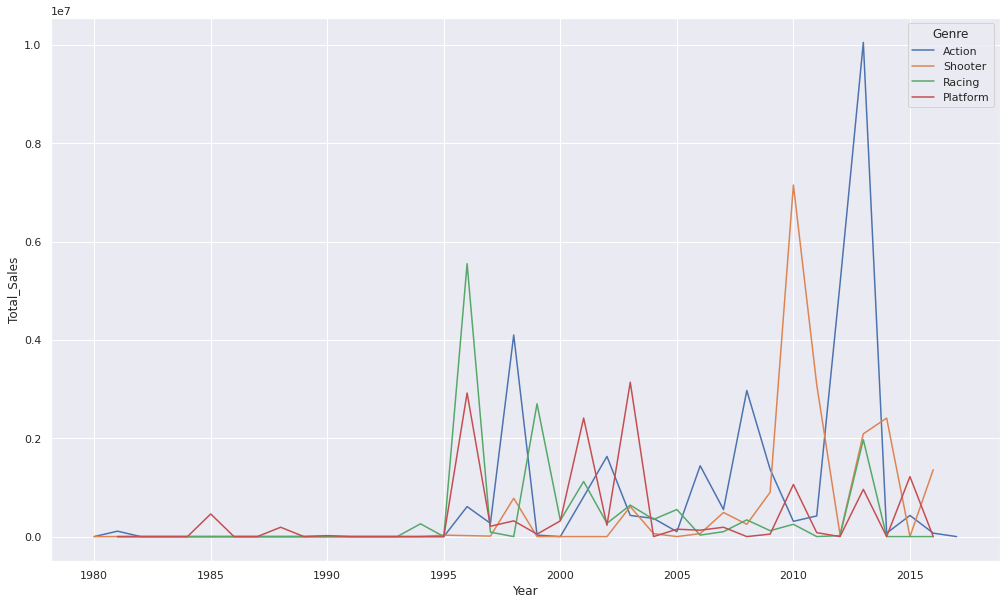

In [38]:
sns.lineplot(x="Year", y="Total_Sales", hue='Genre',data=df_Action,ci=None)

In [39]:
df_Action

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980.0,Action,0.32,0.02,0.00,0.00,0.34
4,1981.0,Action,13.86,110000.70,0.00,0.12,110014.68
11,1982.0,Action,6.07,0.38,0.00,0.05,6.50
18,1983.0,Action,2.67,0.17,0.00,0.02,2.86
25,1984.0,Action,0.80,0.19,0.83,0.03,1.85
...,...,...,...,...,...,...,...
330,2012.0,Platform,7.32,5.88,3.84,1.52,18.56
342,2013.0,Platform,11.62,880008.21,2.08,80002.22,960024.13
354,2014.0,Platform,3.02,3.63,1.26,0.96,8.87
366,2015.0,Platform,1180001.32,40001.77,1.29,0.45,1220004.83


In [40]:
data_yp = data_y
data_yp

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9226,1980.0,2600,Misc,0.25,0.02,0.00,0.00,0.27
5723,1980.0,2600,Shooter,4.00,0.26,0.00,0.05,4.31
14264,1980.0,2600,Fighting,0.72,0.04,0.00,0.01,0.77
12314,1980.0,2600,NaN,0.46,0.03,0.00,0.01,0.50
5938,1980.0,2600,Misc,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...
7177,2016.0,3DS,Action,0.00,0.03,0.04,0.00,0.07
15233,2017.0,PSV,Role-Playing,0.00,0.00,0.01,0.00,0.01
5310,2017.0,PSV,Action,0.00,0.00,0.01,0.00,0.01
10107,2017.0,PS4,Role-Playing,0.00,0.00,0.03,0.00,0.03


In [41]:
data_yp = data_yp.groupby(by=['Year','Platform'], as_index=False).sum()
data_yp

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980.0,2600,10.59,0.67,0.00,0.12,11.38
1,1981.0,2600,33.40,110001.85,0.00,0.32,110035.57
2,1982.0,2600,26.92,1.65,0.00,0.31,28.88
3,1983.0,2600,5.44,0.34,0.00,0.06,5.84
4,1983.0,NES,2.32,0.46,8.10,0.08,10.96
...,...,...,...,...,...,...,...
236,2016.0,X360,0.36,0.40,0.00,0.07,0.83
237,2016.0,XOne,6.69,4.63,0.01,1.05,12.38
238,2017.0,PS4,0.00,0.00,0.03,0.00,0.03
239,2017.0,PSV,0.00,0.00,0.02,0.00,0.02


In [42]:
data_Genre=data.groupby(by=['Genre'], as_index=False).sum()
data_Genre=data_Genre.sort_values(by=['Total_Sales'], axis=0, ascending=False)
data_Genre

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,6509645.0,21650853.16,7210514.95,1440156.46,1340185.11,31641709.68
8,Shooter,2567579.0,12490569.43,6230306.82,60038.22,740101.91,19521016.38
10,Sports,4610619.0,12110668.41,3840372.64,1450133.92,1210133.46,18611308.43
7,Role-Playing,2942353.0,1600317.94,1610181.97,11780333.17,1620055.34,16610888.42
6,Racing,2445913.0,11950345.24,2040235.06,280056.12,420076.68,14690713.10
4,Platform,1751333.0,5220441.22,7620193.99,790129.86,520051.01,14150816.08
3,Misc,3422377.0,4300403.75,2820209.54,420104.85,460073.58,8000791.72
9,Simulation,1703571.0,3240179.72,1110112.24,1280062.42,70031.41,5700385.79
2,Fighting,1673860.0,1360221.84,1420099.80,1340086.00,500036.14,4620443.78
11,Strategy,1343750.0,1050067.65,120045.20,1040048.42,310011.05,2520172.32


In [43]:
data_Name=data.groupby(by=['Name'], as_index=False).sum()
data_Name=data_Name.sort_values(by=['Total_Sales'], axis=0, ascending=False)
data_Name=data_Name.reset_index(drop=True)
data_Name=data_Name.iloc[:31]
data_Name

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,10069.0,9630013.83,23.04,1.39,8.03,9630046.29
1,Halo: Reach,2010.0,7030000.00,1.98,0.08,0.78,7030002.84
2,Mario Kart 64,1996.0,5550000.00,1.94,2.23,0.15,5550004.32
3,Pokemon X/Pokemon Y,2013.0,5170000.00,4.05,4.34,0.79,5170009.18
4,The Legend of Zelda: Ocarina of Time,4009.0,4100002.03,3.16,2.07,0.46,4100007.72
5,Pokemon FireRed/Pokemon LeafGreen,2004.0,4.34,2.65,3150000.00,0.35,3150007.34
6,Pokémon Yellow: Special Pikachu Edition,1998.0,5.89,5.04,3120000.00,0.59,3120011.52
7,FIFA 14,18117.0,2.84,2930008.21,0.20,60002.92,2990014.17
8,Super Mario Bros. 3,3991.0,2930009.54,4.69,4.67,0.66,2930019.56
9,Super Mario 64,4000.0,11.99,2850003.11,3.16,1.21,2850019.47


In [44]:
labels=['North America','Europe','Japan','Other']
ratio=list(data_Name[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum())

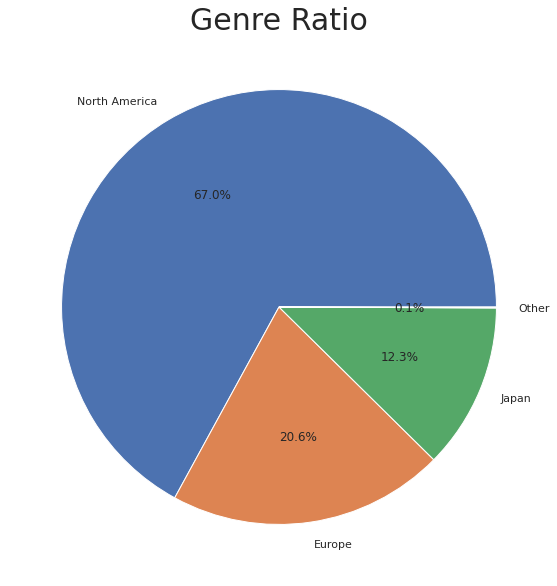

In [45]:
plt.rcParams['figure.figsize'] = [20, 10]#size지정
plt.title('Genre Ratio',fontsize=30)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [46]:
Top30_Name=list(set(data_Name.Name))
check=True
for name in Top30_Name:
  if (check == True):
    Top30= data[data['Name']==name]
    check = False
  else:
    Top30_s = data[data['Name']==name]
    Top30 = pd.concat([Top30,Top30_s])

In [47]:
Top30

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6458,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2850000.00,1.91,0.23,2850009.05
12472,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42
5901,Mario Tennis,GB,2000.0,Sports,Nintendo,0.50,0.18,0.44,0.06,1.18
9877,Mario Tennis,3DS,NaN,Sports,NaN,0.00,0.00,0.02,0.00,0.02
9896,Mario Tennis,Wii,2010.0,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07
...,...,...,...,...,...,...,...,...,...,...
7476,Battlefield 3,PC,2011.0,Shooter,Electronic Arts,0.89,1.43,0.00,0.48,2.80
8010,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2130000.00,0.06,0.69,2130005.21
9452,Battlefield 3,PS3,2011.0,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23
9829,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28


In [48]:
Top30_y =Top30.groupby(by=['Year'], as_index=False).sum()
Top30_y

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1988.0,9.54,3.44,3.84,0.46,17.28
1,1996.0,5550006.91,2850001.94,4.14,0.38,8400013.37
2,1998.0,4100005.89,6.93,3120001.45,0.75,7220015.02
3,1999.0,2570000.00,1.57,0.44,0.21,2570002.22
4,2000.0,4.91,1350001.35,3840000.50,0.43,5190007.19
5,2001.0,2660003.80,2290001.95,0.27,1.37,4950007.39
6,2002.0,1210004.27,4.21,0.11,0.80,1210009.39
7,2003.0,2930000.00,1.25,0.83,0.20,2930002.28
8,2004.0,9.42,5.76,3150001.25,1.33,3150017.76
9,2006.0,3.81,0.63,0.00,0.68,5.12


Text(0.5, 1.0, 'Top 30 Games by Year')

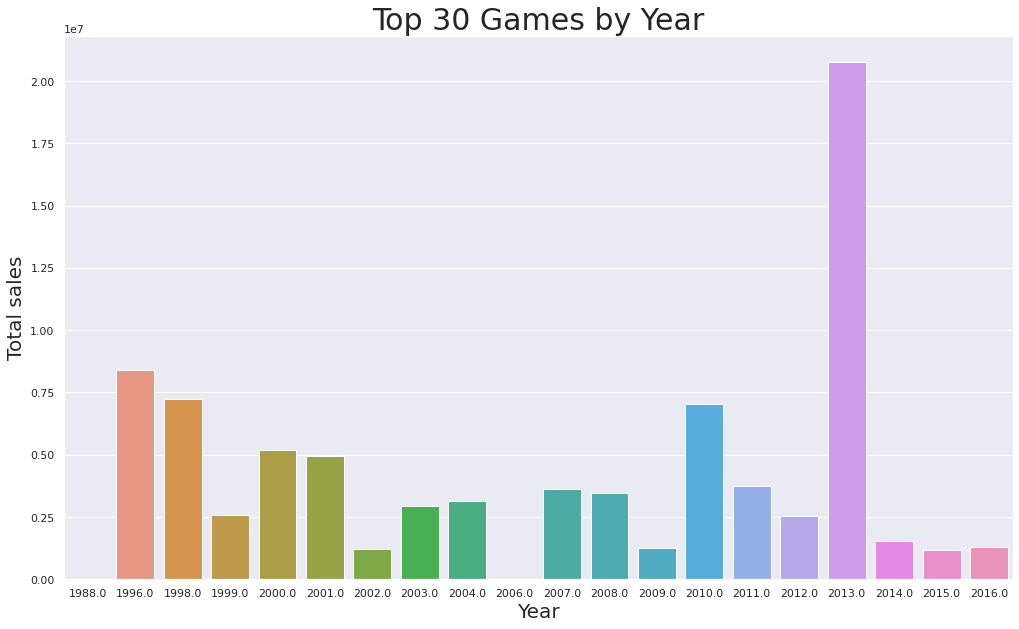

In [49]:
# 북미지역의  게임장르별 판매량 추이
sns.set(rc={'figure.figsize':(17,10)})
sns.set(font_scale=1)
s1=sns.barplot(
    data = Top30_y,
    x= "Year",
    y= "Total_Sales",
    ci = None#error bar 제거
)
s1.set_xlabel('Year',size=20)
s1.set_ylabel('Total sales',size=20)
s1.set_title("Top 30 Games by Year",size=30)

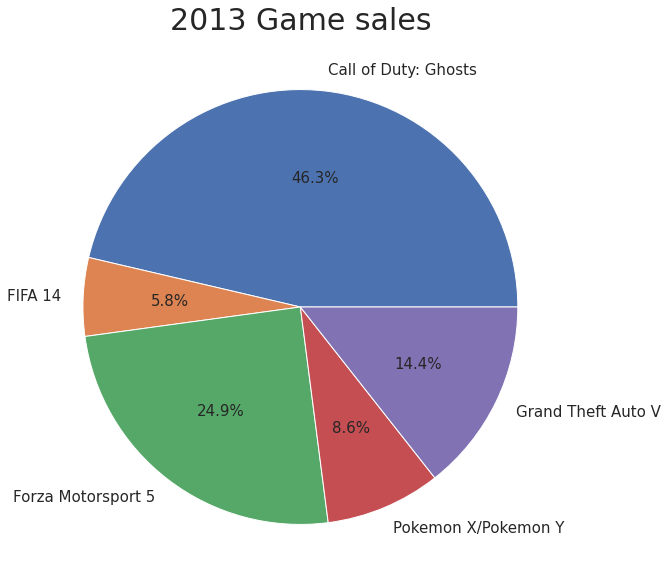

In [50]:
Top30_2013 = Top30[Top30['Year']==2013]
Top30_2013_Name = Top30_2013.groupby(by=['Name'], as_index=False).sum()
labels=list(set(Top30_2013_Name.Name))
ratio=list(set(Top30_2013_Name.Total_Sales))
plt.rcParams['figure.figsize'] = [20, 10]#size지정
plt.title('2013 Game sales',fontsize=30)
plt.pie(ratio, labels=labels, autopct='%.1f%%',textprops={'fontsize': 15})
plt.show()

In [51]:
Top30_g =Top30.groupby(by=['Genre'], as_index=False).sum()

In [52]:
Top30 =Top30.groupby(by=['Year'], as_index=False).sum()

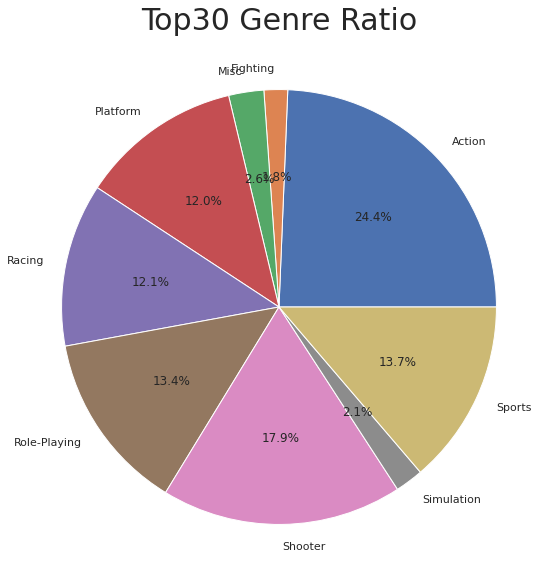

In [56]:
import matplotlib.pyplot as plt

labels=list(Top30_g.Genre)
ratio = list(Top30_g.Total_Sales)
plt.rcParams['figure.figsize'] = [20, 10]#size지정
plt.title('Top30 Genre Ratio',fontsize=30)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()